## PCA - Wine Quality Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipykernel_6218/1032910720.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split # This function is used to split your dataset into a training set and a test set
from sklearn.ensemble import RandomForestClassifier # This is a machine learning model that uses an ensemble of decision trees to make predictions
from sklearn.neighbors import KNeighborsClassifier # This is another machine learning model that makes predictions based on the 'k' nearest neighbors to a given data point
from sklearn.metrics import accuracy_score # This function is used to calculate the accuracy of your model's predictions. 

In [3]:
df = pd.read_csv(r'winequality-red.csv') # Reading data
df.head(10) # Displaying data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape # Viewing shape of data

(1599, 12)

In [5]:
df.describe() # Viewing statistical summary of all columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info() # Viewing concise summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum() # Finding the number of missing or null values in each column of the DataFrame

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

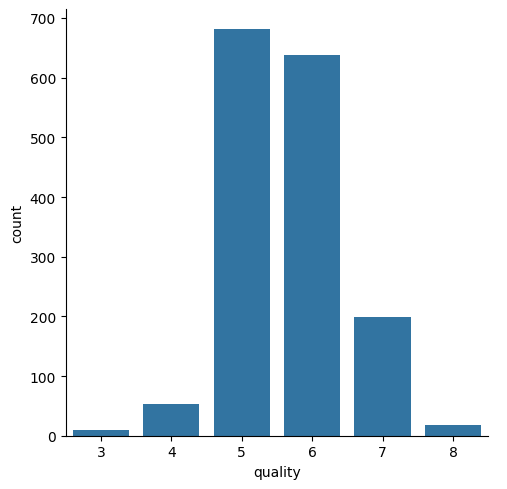

In [8]:
sns.catplot(x='quality', data=df, kind='count') # Plotting a count plot (x-axis, dataset, kind [type])

<Axes: xlabel='quality', ylabel='volatile acidity'>

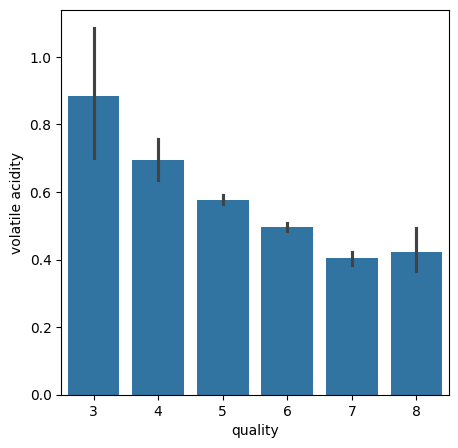

In [9]:
plot = plt.figure(figsize=(5,5)) # Creates a new figure with a specified size of 5x5 inches
sns.barplot(x='quality', y='volatile acidity', data=df) # Plots a bar plot for quality and volatile acidity

<Axes: xlabel='quality', ylabel='citric acid'>

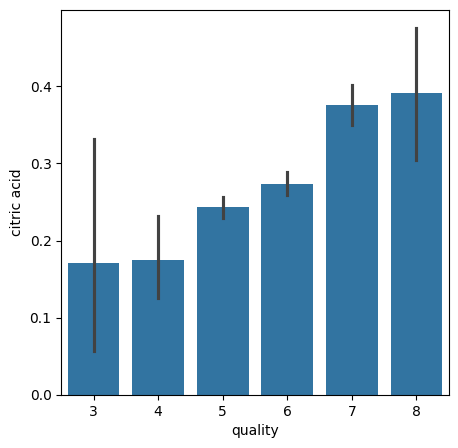

In [10]:
plot = plt.figure(figsize=(5,5)) # Creates a new figure with a specified size of 5x5 inches
sns.barplot(x='quality', y='citric acid', data=df) # Plots a bar plot for quality and citric acid

In [11]:
correlation = df.corr() # Finding correlation

<Axes: >

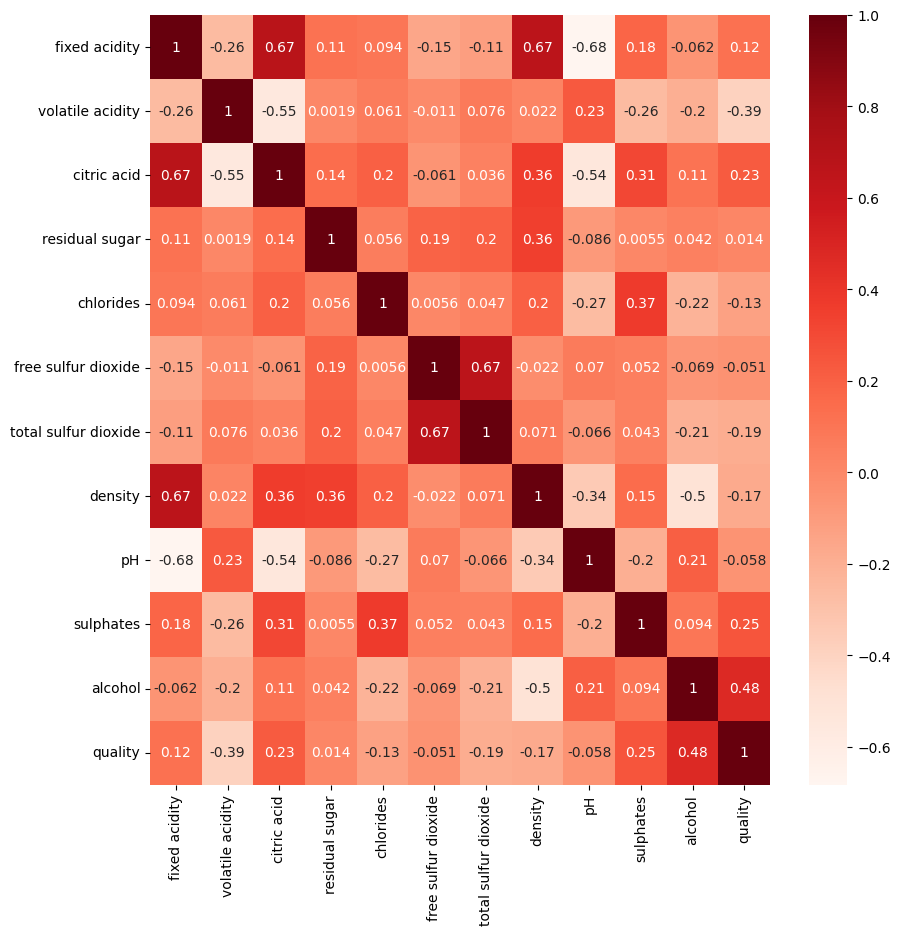

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, annot=True, cmap='Reds') # Plotting a heatmap of the correlation DataFrame

In [13]:
x = df.drop('quality', axis=1) # Dropping the quality column
x.head() # Viewing the DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [14]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
# This applies the lambda function to each value in the 'quality' column.
# The lambda function takes a value y_value and returns 1 if y_value is
# greater than or equal to 7, and 0 otherwise.

y # Display the result

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) # Splits the data into training set and test set

In [16]:
print(y.shape, y_train.shape, y_test.shape) # Prints the splitted data

(1599,) (1279,) (320,)


In [17]:
model = RandomForestClassifier()

In [18]:
model.fit(x_train, y_train) # Training the model

RandomForestClassifier()

In [19]:
x_test_prediction = model.predict(x_test) # Making predictions on test data
test_data_accuracy = accuracy_score(x_test_prediction, y_test) # Calculating accuracy of predictions

accuracy_rf = test_data_accuracy*100 # Converting the accuracy from a proportion (ranging from 0 to 1) 
# to a percentage (ranging from 0 to 100)

print('Accuracy = ', accuracy_rf) # Displays the accuracy

Accuracy =  93.125


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# train_test_split function from the sklearn.model_selection module is used to split the dataset into a training set and a test set.

# x,y: These are the features and labels of the dataset. 
# x is usually a DataFrame or 2D array-like object containing your features
# y is usually a Series or 1D array-like object containing your labels.

# test_size=0.2: This means that 20% of the data will be used for the test set, and the remaining 80% will be used for the training set.

# random_state=0: This sets the seed for the random number generator that shuffles the data before splitting it.
# Setting the seed to a fixed number (like 0) ensures that the output is reproducible,
# i.e., you'll get the same train/test split each time you run this code.


In [21]:
modell = KNeighborsClassifier(n_neighbors = 30) # Setting up a K-nearest neighbors classifier with 30 neighbors
modell.fit(x_train, y_train) # Training the model based on our data

KNeighborsClassifier(n_neighbors=30)

In [22]:
prediction = modell.predict(x_test) # Making predictions on the test data

In [23]:
accuracy2 = accuracy_score(y_test,prediction) # Calculate the accuracy of predictions
# 'y_test' is true labels and 'predictions' is the predicted labels

accuracy_knn = accuracy2*100 # Converting the accuracy from a proportion (ranging from 0 to 1) to a percentage (ranging from 0 to 100)
print("Accuracy = ",accuracy_knn) # Displaying the accuracy

Accuracy =  90.3125


In [24]:
models = {
    "models": ['RandomForestClassifier','KNeighborsClassifier'], # This key-value pair is storing the names of two machine learning models 
    # as a list of strings.

    "score": [accuracy_rf, accuracy_knn]  # This key-value pair is storing the accuracy scores of the two models as a list of numbers.
}
models

{'models': ['RandomForestClassifier', 'KNeighborsClassifier'],
 'score': [93.125, 90.3125]}

/tmp/ipykernel_6218/1333390122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models['models'], y=models['score'], palette=colors) # Creating bar plot
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


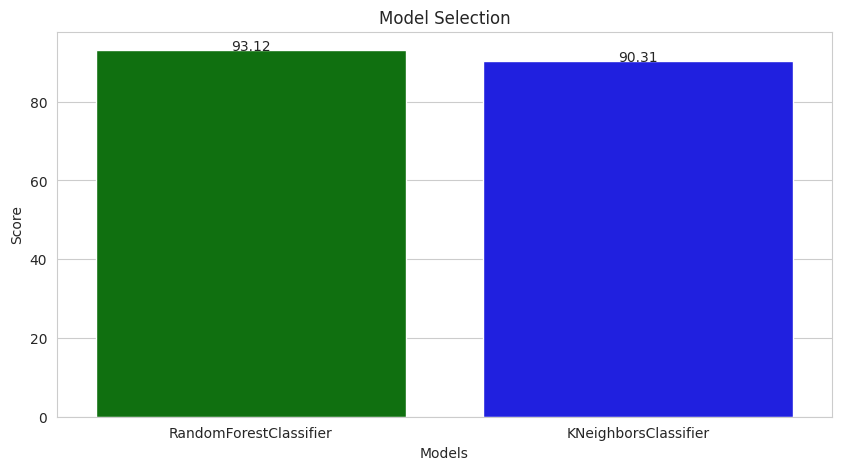

In [25]:
colors = ['green', 'blue'] # Setting color for bar graph
sns.set_style('whitegrid') # Setting the style fo plot ('whitegrid' contains gridlines for easy comparision)

plt.figure(figsize=(10,5)) # Creating a new figure with a specified size (10 units wide and 5 units tall).
ax = sns.barplot(x=models['models'], y=models['score'], palette=colors) # Creating bar plot

# Labeling axis and title
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")

# This loop adds the height of each bar as text above the bar.
# This is done using the text method of the Axes object ax.
# The height of the bar is obtained using the get_height method of the Patch object p,
# and the x-coordinate for the text is calculated as the x-coordinate of the bar plus
# half its width (p.get_x() + p.get_width() / 2.).

for p in ax.patches:
  ax.text(x=p.get_x() + p.get_width() / 2.,
          y=p.get_height(),
          s='{:.2f}'.format(p.get_height()),
          ha='center')

plt.show(); # Displaying the plot